# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 646


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto baquerizo moreno
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | luwuk
Processing Record 4 of Set 1 | san antonio de pale
Processing Record 5 of Set 1 | ust-nera
Processing Record 6 of Set 1 | tsiombe
Processing Record 7 of Set 1 | sharm el-sheikh
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | valparaiso
Processing Record 10 of Set 1 | dongola
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | fale old settlement
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | bhakkar
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | la passe
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto baquerizo moreno,-0.9000,-89.6000,24.55,61,75,6.17,EC,1730744648
1,olonkinbyen,70.9221,-8.7187,1.05,99,100,7.72,SJ,1730744649
2,luwuk,-0.9516,122.7875,22.28,83,94,1.96,ID,1730744651
3,san antonio de pale,-1.4014,5.6325,25.57,83,98,5.83,GQ,1730744652
4,ust-nera,64.5667,143.2000,-25.45,99,98,1.28,RU,1730744653


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto baquerizo moreno,-0.9000,-89.6000,24.55,61,75,6.17,EC,1730744648
1,olonkinbyen,70.9221,-8.7187,1.05,99,100,7.72,SJ,1730744649
2,luwuk,-0.9516,122.7875,22.28,83,94,1.96,ID,1730744651
3,san antonio de pale,-1.4014,5.6325,25.57,83,98,5.83,GQ,1730744652
4,ust-nera,64.5667,143.2000,-25.45,99,98,1.28,RU,1730744653


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

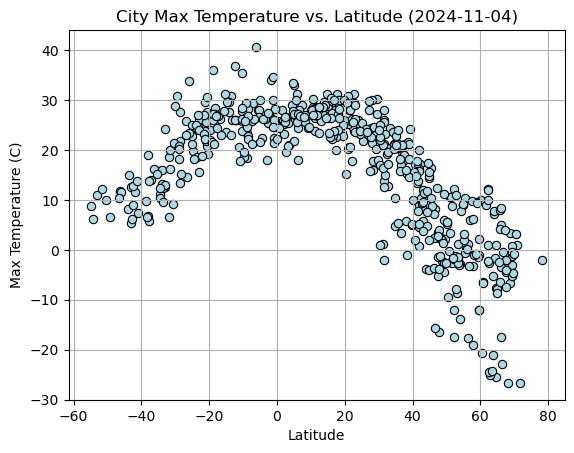

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],color='lightblue', edgecolors='black', linewidth=0.8, marker = 'o')

#datedf['Formatted Date'] = city_data_df['Date'].apply(lambda x: time.ctime(x))
timestamp = city_data_df['Date'][0]
formatted_date = time.strftime('%Y-%m-%d', time.gmtime(timestamp))

# Incorporate the other graph properties
plt.title(f"City Max Temperature vs. Latitude ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

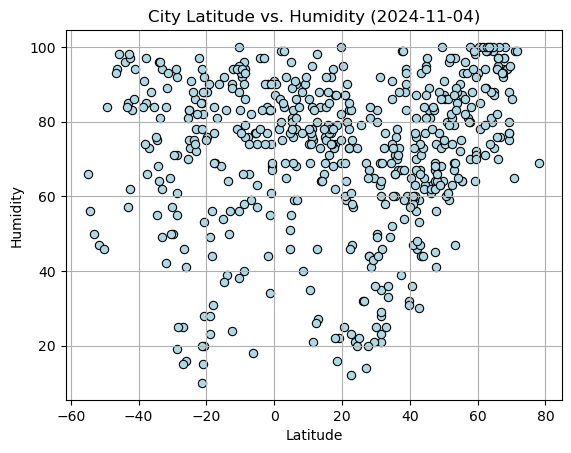

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],color='lightblue', edgecolors='black', linewidth=0.8, marker = 'o')

# Incorporate the other graph properties
timestamp = city_data_df['Date'][0]
formatted_date = time.strftime('%Y-%m-%d', time.gmtime(timestamp))
plt.title(f"City Latitude vs. Humidity ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

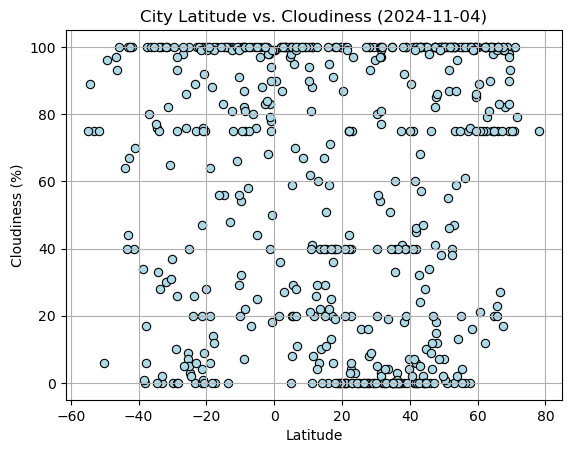

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],color='lightblue', edgecolors='black', linewidth=0.8, marker = 'o')

# Incorporate the other graph properties
timestamp = city_data_df['Date'][0]
formatted_date = time.strftime('%Y-%m-%d', time.gmtime(timestamp))
plt.title(f"City Latitude vs. Cloudiness ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

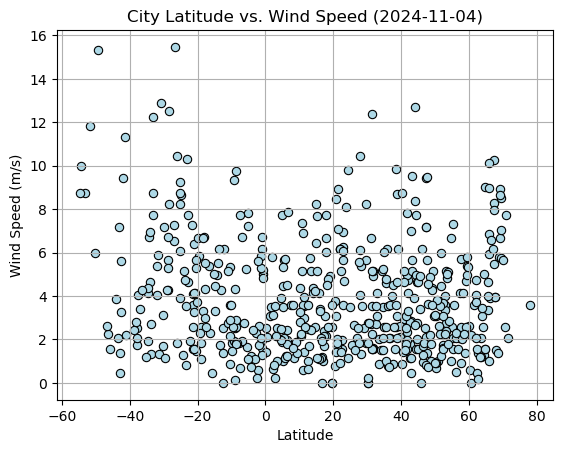

In [40]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],color='lightblue', edgecolors='black', linewidth=0.8, marker = 'o')

# Incorporate the other graph properties
timestamp = city_data_df['Date'][0]
formatted_date = time.strftime('%Y-%m-%d', time.gmtime(timestamp))
plt.title(f"City Latitude vs. Wind Speed ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [109]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    r_squared = r_value**2
    regression_line = slope * np.array(x) + intercept
    
    plt.scatter(x, y, color='lightblue', edgecolors='lightgray', linewidth=0.5)
    plt.plot(x, regression_line, color='red', label=f'y = {slope:.2f} x + {intercept:.2f}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    print(f"The r^2 value is: {r_squared}")
    plt.show()


In [110]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,1.05,99,100,7.72,SJ,1730744649
4,ust-nera,64.5667,143.2000,-25.45,99,98,1.28,RU,1730744653
6,sharm el-sheikh,27.8518,34.3050,24.43,44,8,4.05,EG,1730744503
7,longyearbyen,78.2186,15.6401,-2.09,69,75,3.60,SJ,1730744371
9,dongola,19.1667,30.4833,23.41,22,0,4.91,SD,1730744658


In [111]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto baquerizo moreno,-0.9000,-89.6000,24.55,61,75,6.17,EC,1730744648
2,luwuk,-0.9516,122.7875,22.28,83,94,1.96,ID,1730744651
3,san antonio de pale,-1.4014,5.6325,25.57,83,98,5.83,GQ,1730744652
5,tsiombe,-25.3000,45.4833,22.97,81,9,8.26,MG,1730744654
8,valparaiso,-33.0393,-71.6273,24.13,49,0,8.75,CL,1730744657


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.7099961652248667


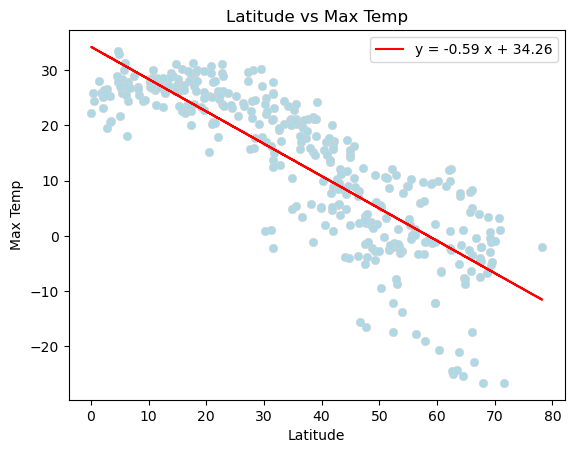

In [112]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    xlabel='Latitude',
    ylabel='Max Temp',
    title="Latitude vs Max Temp"
)

The r^2 value is: 0.5666476941952968


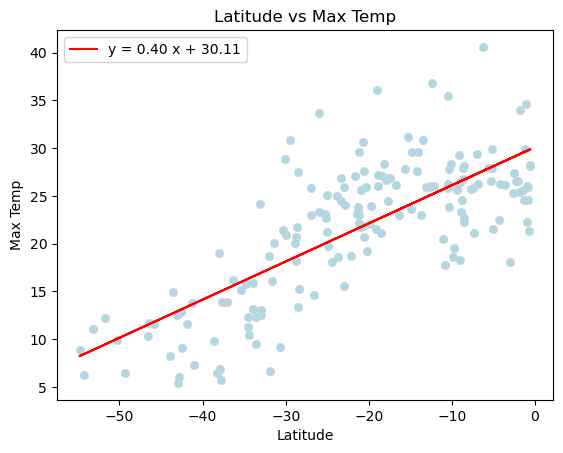

In [113]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp'],
    xlabel='Latitude',
    ylabel='Max Temp',
    title="Latitude vs Max Temp"
)

**Discussion about the linear relationship:** The model shows that as Latitude approaches 0, the temperature rises. Additionaly, the temperature lowers as you get further away from Latitude 0 in either direction.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.055946189839964425


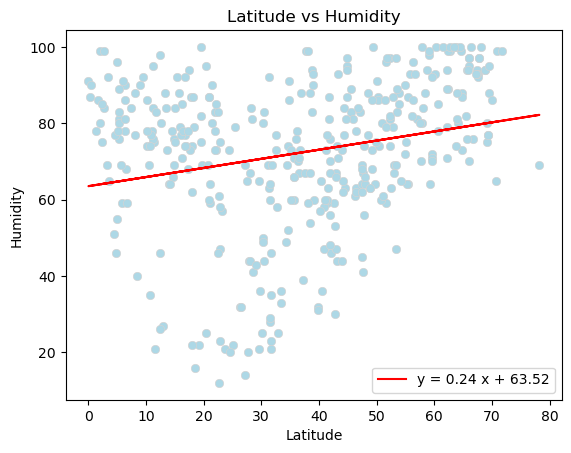

In [114]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    xlabel='Latitude',
    ylabel='Humidity',
    title="Latitude vs Humidity"
)

The r^2 value is: 6.035108645089107e-05


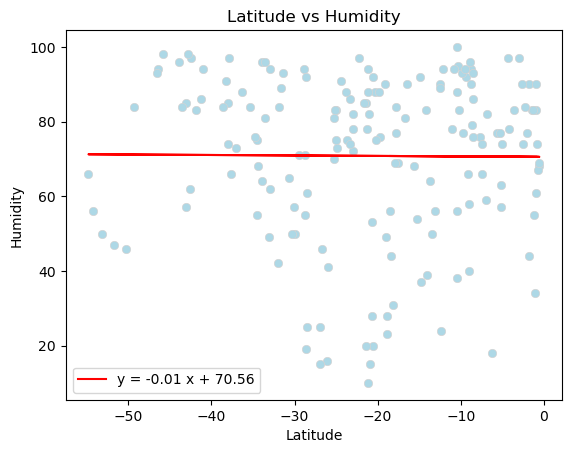

In [115]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    xlabel='Latitude',
    ylabel='Humidity',
    title="Latitude vs Humidity"
)

**Discussion about the linear relationship:** It seems that humidity is relatively constant, with most values between 60-80. The extreme lows tend to be within 30 latitude in either direction.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.03258097838084996


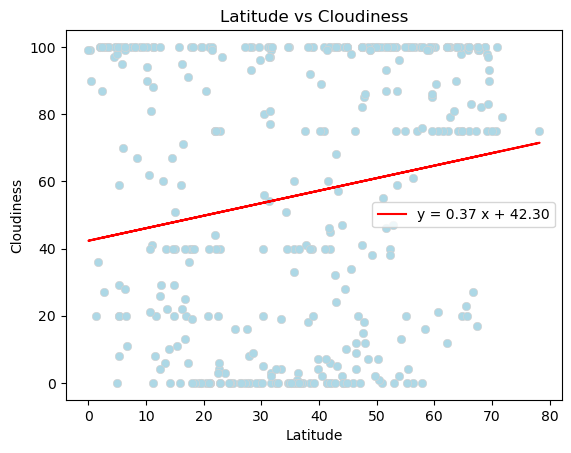

In [117]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    xlabel='Latitude',
    ylabel='Cloudiness',
    title="Latitude vs Cloudiness"
)

The r^2 value is: 0.01974886650062853


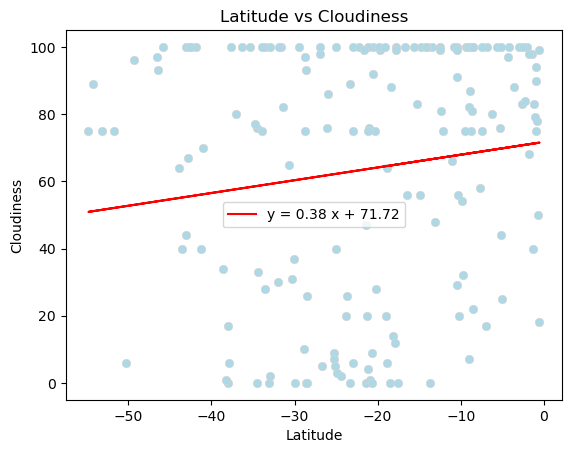

In [116]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    xlabel='Latitude',
    ylabel='Cloudiness',
    title="Latitude vs Cloudiness"
)

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.013203481104995215


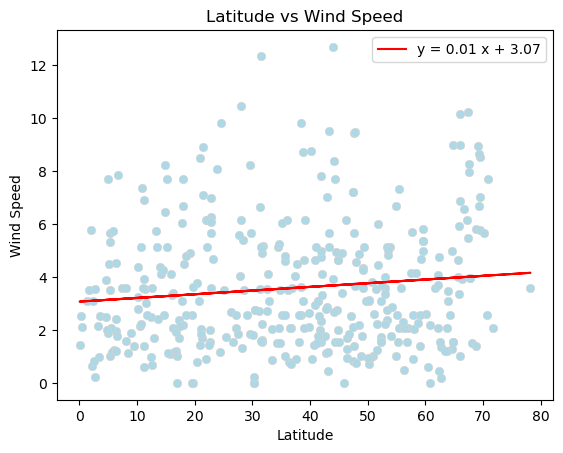

In [119]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    xlabel='Latitude',
    ylabel='Wind Speed',
    title="Latitude vs Wind Speed"
)

The r^2 value is: 0.0882611903457545


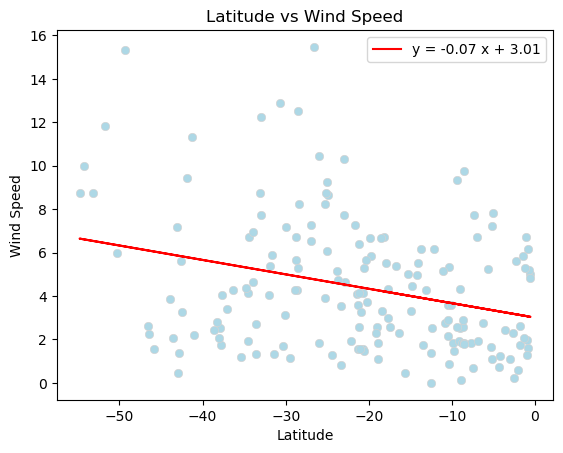

In [120]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    xlabel='Latitude',
    ylabel='Wind Speed',
    title="Latitude vs Wind Speed"
)

**Discussion about the linear relationship:** Wind Speed gets lower as latitude approaches 0, with most values being between 0-6.
